In [23]:
# !pip install wordcloud
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
# from nltk import word_tokenize          
# from nltk.stem import WordNetLemmatizer 

# from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import logging

# !pip install -U -q PyDrive
# !pip install -q glove_python
import numpy as np
import pandas as pd

# import nltk
# from nltk.tokenize import sent_tokenize,word_tokenize
# from nltk.corpus import stopwords
import string

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('universal_tagset')
# nltk.download('wordnet')
# lemmatizer = nltk.WordNetLemmatizer()
from bs4 import BeautifulSoup  
import re
# import nltk
# from nltk.corpus import stopwords 
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import SnowballStemmer, WordNetLemmatizer
# from nltk import sent_tokenize, word_tokenize, pos_tag
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC

In [8]:
df = pd.read_json('E:\Semester5\ML\Project\Electronics_5.json', orient='columns',lines=True)

In [9]:
# Remove any 'neutral' ratings equal to 3
df = df[df['overall'] != 3]

# # df = pd.concat(f1)
# df = df.sample(frac=0.7, random_state=0) #uncomment to use full set of data
# # Drop missing values
df.dropna(inplace=True)

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['overall'] > 3, 1, 0)

In [ ]:
print(df['Sentiment'].value_counts())


Sentiment
1    1336329
0     187942
Name: count, dtype: int64


In [11]:
# Sort the dataset by the 'overall' column
df = df.sort_values(by=['Sentiment'])

# Select the first 20,000 rows for negative sentiment
dfnegative = df[df['Sentiment'] == 0].head(20000)

# Select the first 20,000 rows for positive sentiment
dfpositive = df[df['Sentiment'] == 1].head(20000)

# Combine both datasets
df = pd.concat([dfnegative, dfpositive])


In [ ]:
print("The Number of Reviews less than rating 3")
df[df['overall'] < 3].shape

The Number of Reviews less than rating 3


(20000, 10)

In [ ]:
print("The Number of Reviews greater than 3")
df[df['overall'] > 3].shape

The Number of Reviews greater than 3


(20000, 10)

The Size of Dataset (40000, 10)
Distribution of Positive and Negative Reviews, Three being the threshold


array([[<Axes: title={'center': 'overall'}>]], dtype=object)

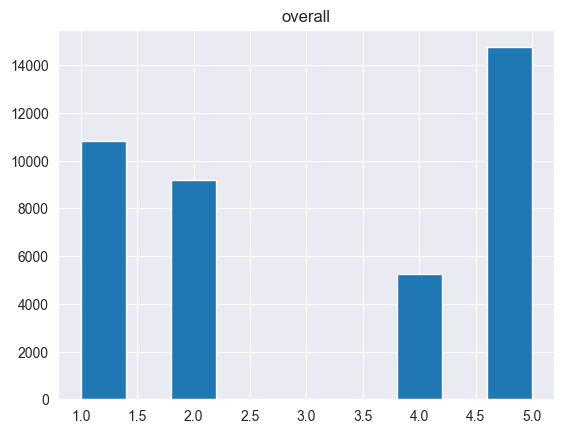

In [14]:
print("The Size of Dataset",df.shape)
print('Distribution of Positive and Negative Reviews, Three being the threshold')
df.hist('overall')

The Size of Dataset (40000, 10)
Distribution of Positive and Negative Reviews, Three being the threshold


array([[<Axes: title={'center': 'overall'}>]], dtype=object)

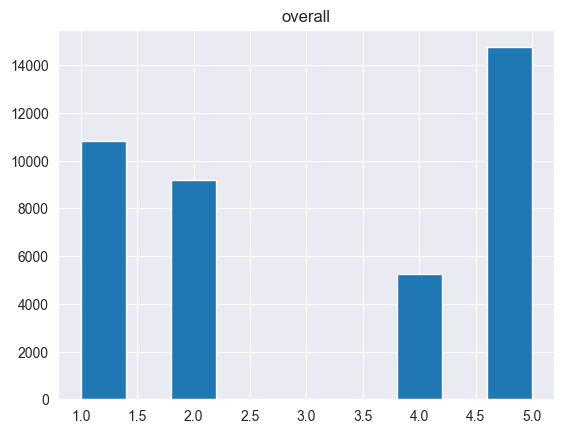

In [ ]:
print("The Size of Dataset",df.shape)
print('Distribution of Positive and Negative Reviews, Three being the threshold')
df.hist('overall')

In [16]:
X = df['reviewText']
y = df['Sentiment']

In [17]:
def cleanText(raw_text, remove_stopwords=True, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        stops.remove('not')
        stops.remove('no')
        words = [w for w in words if not w in stops]
    if stemming==True: # stemming
        stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [18]:
X_cleaned = []
    
for d in X:
    X_cleaned.append(cleanText(d))

NameError: name 'stopwords' is not defined

In [ ]:
from sklearn.pipeline import Pipeline


def grid_search(X_train, y_train,X_test,y_test):
    classifiers = ['Adaboost','KNN','SVM','MNB','LR'];
    pipeline1 = Pipeline([(
    ('clf', AdaBoostClassifier())
    )])

    pipeline2 = Pipeline([(
    ('clf', KNeighborsClassifier())
    )])

    pipeline3 = Pipeline([(
    ('clf', SVC())
    )])

    pipeline4 = Pipeline([(
    ('clf', MultinomialNB())
    )])
    
    pipeline5 = Pipeline([(
    ('clf', LogisticRegression())
    )])

    parameters1 = {
    'clf__n_estimators': [50,100,150],
        'clf__learning_rate': [0.1,1.0],

    }

    parameters2 = {
    'clf__n_neighbors': [3, 5, 7, 10],
    'clf__weights': ['uniform', 'distance'],
    }

    parameters3 = {
    'clf__C': [0.01, 0.1, 1.0],
    'clf__kernel': ['linear'],
    'clf__gamma': [0.01, 0.1, 1.0],

    }
    parameters4 = {
    'clf__alpha': [0.01, 0.1, 1.0],
    }
    
    parameters5 = {
        'clf__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
        "clf__penalty":["l1","l2"]
    }

    pars = [parameters3]
    pips = [pipeline3]

    print ("Starting Gridsearch..")
    for i in range(len(pars)):
        gs = GridSearchCV(pips[i], pars[i], verbose=2, n_jobs=-1)
        gs = gs.fit(X_train, y_train)
        print ("Finished Gridsearch For",classifiers[i])
        print('The Best Model Achieved for {} with Score {} and the best parameters are {}'.format(classifiers[i],gs.best_score_,gs.best_params_))
        y_pred = gs.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
        print(classification_report(y_test, y_pred, target_names=target_names))
        print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    return

In [ ]:
countVect = CountVectorizer(min_df=50, ngram_range=(1,2), strip_accents='unicode', binary=True)
X_all_countVect = countVect.fit_transform(X_cleaned)

print("Number of features : %d \n" % len(countVect.get_feature_names_out()))  # 1722
print("Show some feature names : \n", countVect.get_feature_names_out()[::1000])


In [ ]:
def knn_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target): 
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_countVect,y_train)

    y_pred=classifier.predict(X_test_countVect)

    y_pred_train = classifier.predict(X_train_countVect)
    # print('KNN Results:')
    # print("KNN Accuracy:",metrics.accuracy_score(y_test,y_pred))
    # print(classification_report(y_test, y_pred))
    # print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    # print("KNN Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
    # print(classification_report(y_train, y_pred_train))
    
    return metrics.accuracy_score(y_test,y_pred)

In [ ]:
#SVM
def svc_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  from sklearn import svm
  clf=svm.SVC(kernel='linear')
  clf.fit(X_train_countVect,y_train)

  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)

# scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# print("scores",scores.avg)
  # print('SVM Results:')
  # print("SVM Accuracy:",metrics.accuracy_score(y_test,y_pred))
  # print(classification_report(y_test, y_pred, target_names=target_names))
  # print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  # print("SVM Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  # print(classification_report(y_train, y_pred_train, target_names=target_names))

  return metrics.accuracy_score(y_test,y_pred)
  
  

In [ ]:
# Naive Bayes classifier
def nb_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 

  clf = MultinomialNB()
  clf.fit(X_train_countVect.toarray(),y_train)

  y_pred=clf.predict(X_test_countVect)

  y_pred_train =clf.predict(X_train_countVect)
#   print('NB Results:')
# #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
#   print("MNB Accuracy:",metrics.accuracy_score(y_test,y_pred))
#   print(classification_report(y_test, y_pred, target_names=target_names))
#   print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
#   print("MNB Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
#   print(classification_report(y_train, y_pred_train, target_names=target_names))

  return metrics.accuracy_score(y_test,y_pred)
  




In [ ]:
# Logistic Regression
def lr_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  lr = LogisticRegression()
  lr.fit(X_train_countVect.toarray(), y_train)


  y_pred=lr.predict(X_test_countVect)

  y_pred_train =lr.predict(X_train_countVect)
  # print('LR Results:')
  # #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  # print("LR Accuracy:",metrics.accuracy_score(y_test,y_pred))
  # print(classification_report(y_test, y_pred, target_names=target_names))
  # print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  # print("LR Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  # print(classification_report(y_train, y_pred_train, target_names=target_names))
  
  return metrics.accuracy_score(y_test,y_pred)




In [19]:
# #   Decision Trees
def dt_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names): 
  clf = AdaBoostClassifier(n_estimators=400,learning_rate=1)
  clf.fit(X_train_countVect,y_train)
  
  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)


  # print('Adaboosting Results:')
  # print("Adaboosting DT Accuracy:",metrics.accuracy_score(y_test,y_pred))
  # print(classification_report(y_test, y_pred, target_names=target_names))
  # print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  # print("Adaboosting DT Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  # print(classification_report(y_train, y_pred_train, target_names=target_names))
  
  return metrics.accuracy_score(y_test,y_pred)

In [22]:
countVect = CountVectorizer(min_df=50, ngram_range=(1,2), strip_accents='unicode', binary=True)
X_all_countVect = countVect.fit_transform(X_cleaned)

print("Number of features : %d \n" % len(countVect.get_feature_names_out()))  # 1722
print("Show some feature names : \n", countVect.get_feature_names_out()[::1000])


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [21]:
knn = []
svm = []
dt = []
nb = []
lr = []
rus = RandomUnderSampler(random_state=777)
X_RUS, y_RUS = rus.fit_resample(X_all_countVect, y)  # Updated method
target_names = ['Positive', 'Negative']
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X_RUS, y_RUS):
    X_train_countVect = X_RUS[train_index]
    y_train = y_RUS[train_index]
    X_test_countVect = X_RUS[test_index]
    y_test = y_RUS[test_index]
    
    knn_mean = knn_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names)
    knn.append(knn_mean)
    dt_mean = dt_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names)
    dt.append(dt_mean)
    nb_mean = nb_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names)
    nb.append(nb_mean)
    lr_mean = lr_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names)
    lr.append(lr_mean)
    svm_mean = svc_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names)
    svm.append(svm_mean)

    print('The Accuracy for KNN:', sum(knn) / len(knn))
    print('The Accuracy for SVM:', sum(svm) / len(svm))
    print('The Accuracy for DT:', sum(dt) / len(dt))
    print('The Accuracy for MNB:', sum(nb) / len(nb))
    print('The Accuracy for LR:', sum(lr) / len(lr))


NameError: name 'X_all_countVect' is not defined